In [ ]:
import os
import sys

module_path = os.path.abspath(os.path.join("../../../"))
print(f"module_path: {module_path}")
if module_path not in sys.path:
    print(f"Adding {module_path} to sys.path")
    sys.path.append(module_path)

In [ ]:
os.environ["TF_FORCE_UNIFIED_MEMORY"] = "1"

In [ ]:
## import packages
import jax
import torch
import 
import numpy as np
import numpy.polynomial.legendre
import seaborn
import matplotlib.pyplot as plt
from typing import Any, Tuple
import jax.numpy as jnp
from jaxtyping import Array, Float
from scipy import special as ss
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
print(jax.devices())
print(f"The Device: {jax.lib.xla_bridge.get_backend().platform}")

In [ ]:
print(f"MPS enabled: {torch.backends.mps.is_available()}")

In [ ]:
from src.models.hippo.transition import TransMatrix

In [ ]:
# Define a color cycle
colors = cycle(["r", "g", "b", "c", "m", "y", "k"])

In [ ]:
def example_legendre(matrix, N=8):

    x = (np.random.rand(N) - 0.5) * 2
    t = np.linspace(-1, 1, N)
    norm_matrix = (matrix / np.linalg.norm(matrix)) * 10

    seaborn.set_context("talk")
    fig = plt.figure(figsize=(20, 10))
    ax = fig.gca(projection="3d")
    ax.plot(
        np.linspace(-25, (matrix.shape[1] - 1) * 100 + 25, 100),
        [0] * 100,
        zs=-1,
        zdir="x",
        color="black",
    )
    for i in range(matrix.shape[0]):
        ax.set_zlim(-4, 4)
        ax.set_yticks([])
        ax.set_zticks([])
        color = next(colors)
        ax.plot(
            np.arange(matrix.shape[1]),
            norm_matrix[i],
            zs=100 * i,
            zdir="y",
            c=color,
            alpha=0.5,
        )
    ax.view_init(elev=10.0, azim=-45)
    plt.show()

In [ ]:
N = 5

In [ ]:
def visualize_A(A):
    # Plot HiPPO matrix A as N number of signals
    plt.figure(figsize=(16, 8))
    fig, ax = plt.subplots()
    for i in range(A.shape[0]):
        color = next(colors)
        ax.plot(np.arange(A.shape[1]), A[i], color=color)
    ax.set_title("HiPPO Matrix A as N Number of Signals")
    ax.set_xlabel("Time")
    ax.set_ylabel("Signal Value")
    plt.show()

    # # Create a 3D meshgrid for the x, y, and z coordinates
    # x, y = np.meshgrid(np.arange(A.shape[1]), np.arange(A.shape[0]))
    # z = np.tile(np.arange(A.shape[0]), (A.shape[1], 1)).T

    # # Plot HiPPO matrix A as N number of lines in 3D space
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # for i in range(A.shape[0]):
    #     color = next(colors)
    #     ax.plot(x[i], y[i], z[i], color=color)
    # ax.set_title('HiPPO Matrix A as N Number of Lines in 3D Space')
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # ax.set_zlabel('Z')
    # plt.show()

In [ ]:
# def visualize_B(B):
#     # Plot HiPPO matrix B as N number of signals
#     fig, ax = plt.subplots()
#     for i in range(B.shape[0]):
#         ax.plot(np.arange(B.shape[1]), B[i], color='black')
#     ax.set_title('HiPPO Matrix B as N Number of Signals')
#     ax.set_xlabel('Time')
#     ax.set_ylabel('Signal Value')
#     plt.show()

In [ ]:
def visualize_B(A, B):
    # Plot HiPPO matrix B as N number of signals
    # Pad shorter rows in matrix B with zeros
    plt.figure(figsize=(16, 8))
    B_padded = np.zeros((B.shape[0], A.shape[1]))
    B_padded[:, : B.shape[1]] = B

    fig, ax = plt.subplots()
    for i in range(B_padded.shape[0]):
        color = next(colors)
        ax.plot(np.arange(B_padded.shape[1]), B_padded[i], color=color)
    ax.set_title("HiPPO Matrix B as N Number of Signals")
    ax.set_xlabel("Time")
    ax.set_ylabel("Signal Value")
    plt.show()

    # Create a 3D meshgrid for the x, y, and z coordinates
    # x, y = np.meshgrid(np.arange(B_padded.shape[1]), np.arange(B_padded.shape[0]))
    # z = np.tile(np.arange(B_padded.shape[0]), (B_padded.shape[1], 1)).T

    # # Plot HiPPO matrix B as N number of lines in 3D space
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # for i in range(B_padded.shape[0]):
    #     color = next(colors)
    #     ax.plot(x[i], y[i], z[i], color=color)
    # ax.set_title('HiPPO Matrix B as N Number of Lines in 3D Space')
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # ax.set_zlabel('Z')
    # plt.show()

In [ ]:
# generate random HiPPO matrices A and B
legt_matrices = TransMatrix(N=N, measure="legt", lambda_n=1.0)
A, B = legt_matrices.A, legt_matrices.B

<Figure size 1152x576 with 0 Axes>

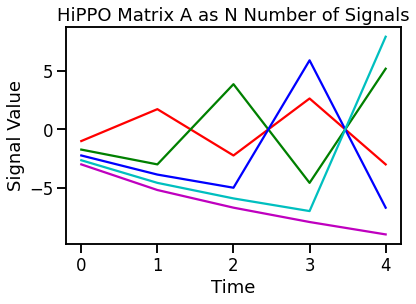

In [ ]:
visualize_A(A)

<Figure size 1152x576 with 0 Axes>

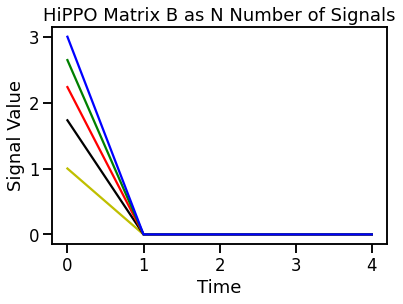

In [ ]:
visualize_B(A, B)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


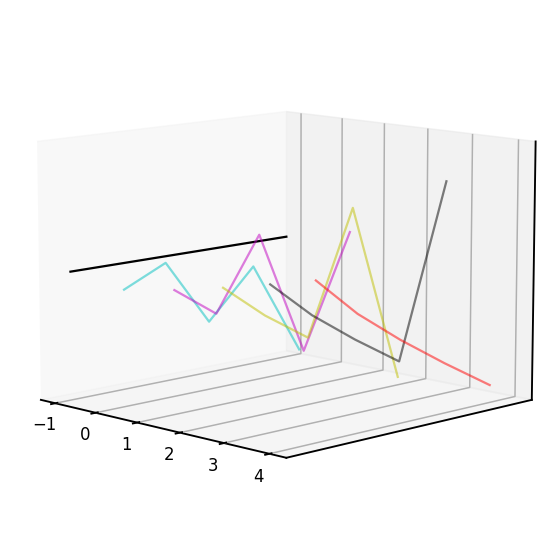

In [ ]:
example_legendre(legt_matrices.A, N=N)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


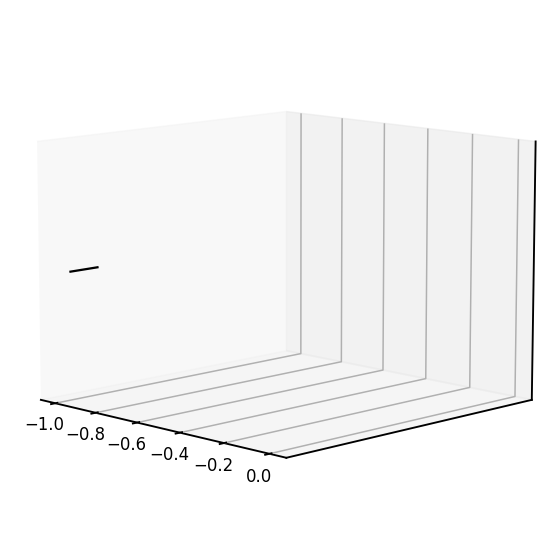

In [ ]:
example_legendre(legt_matrices.B, N=N)

In [ ]:
lmu_matrices = TransMatrix(
    N=N, measure="lmu", lambda_n=2.0
)  # change lambda so resulting matrix is in the form of LMU
A, B = lmu_matrices.A, lmu_matrices.B

<Figure size 1152x576 with 0 Axes>

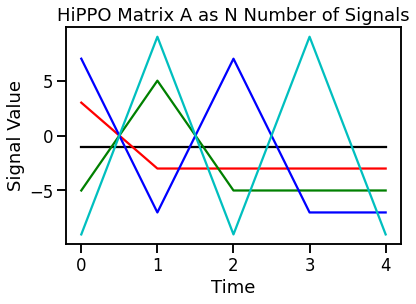

In [ ]:
visualize_A(A)

<Figure size 1152x576 with 0 Axes>

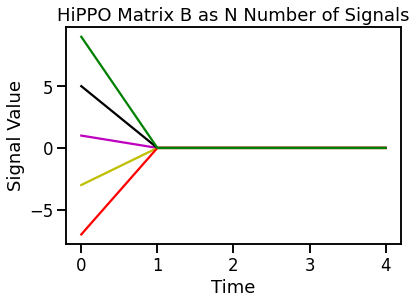

In [ ]:
visualize_B(A, B)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


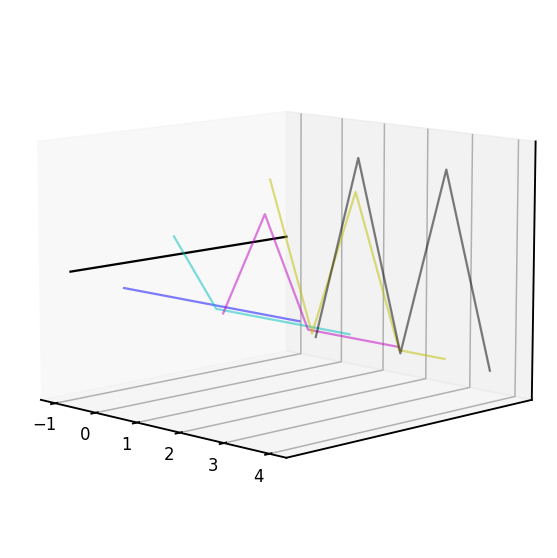

In [ ]:
example_legendre(lmu_matrices.A, N=N)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


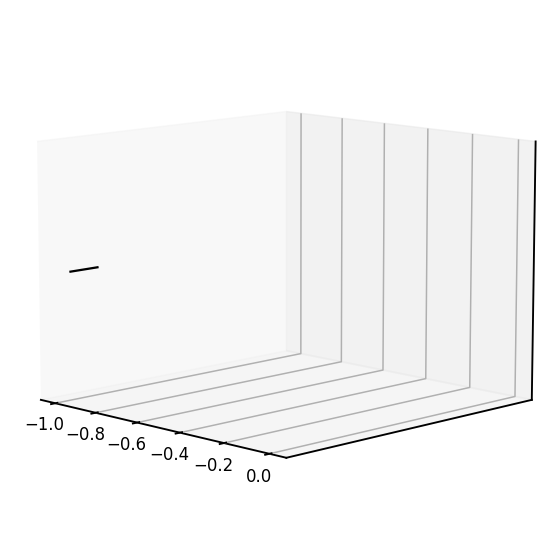

In [ ]:
example_legendre(lmu_matrices.B, N=N)

In [ ]:
lagt_matrices = TransMatrix(
    N=N,
    measure="lagt",
    alpha=0.0,  # change resulting tilt through alpha and beta
    beta=1.0,
)  # change resulting tilt through alpha and beta
A, B = lagt_matrices.A, lagt_matrices.B

<Figure size 1152x576 with 0 Axes>

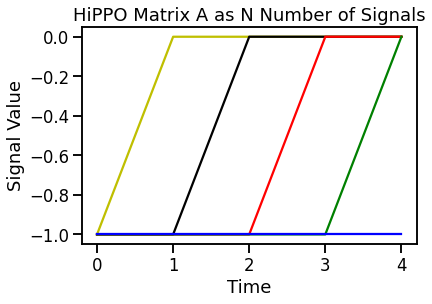

In [ ]:
visualize_A(A)

<Figure size 1152x576 with 0 Axes>

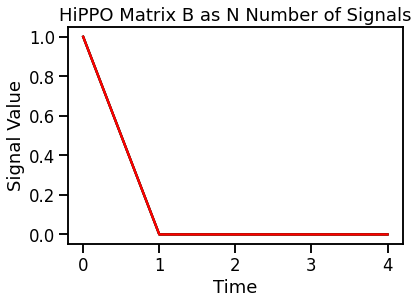

In [ ]:
visualize_B(A, B)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


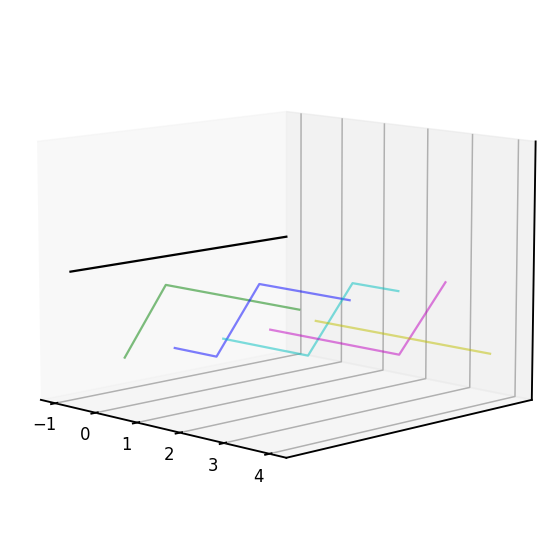

In [ ]:
example_legendre(lagt_matrices.A, N=N)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


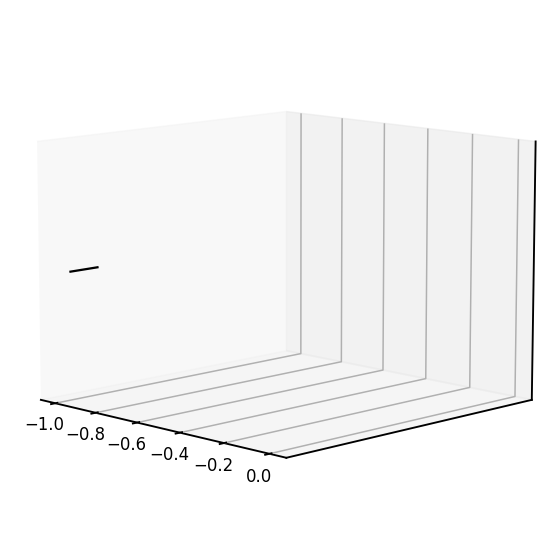

In [ ]:
example_legendre(lagt_matrices.B, N=N)

In [ ]:
legs_matrices = TransMatrix(N=N, measure="legs")
A, B = legs_matrices.A, legs_matrices.B

<Figure size 1152x576 with 0 Axes>

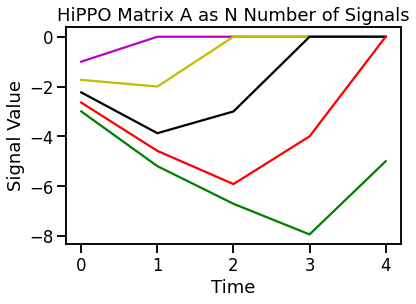

In [ ]:
visualize_A(A)

<Figure size 1152x576 with 0 Axes>

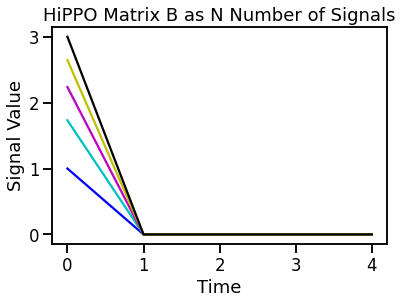

In [ ]:
visualize_B(A, B)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


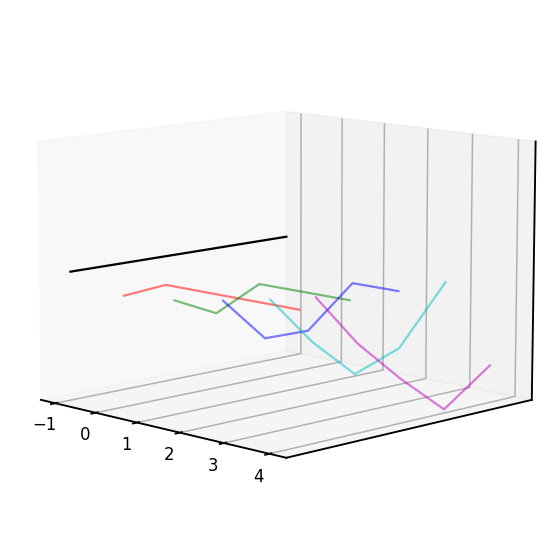

In [ ]:
example_legendre(legs_matrices.A, N=N)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


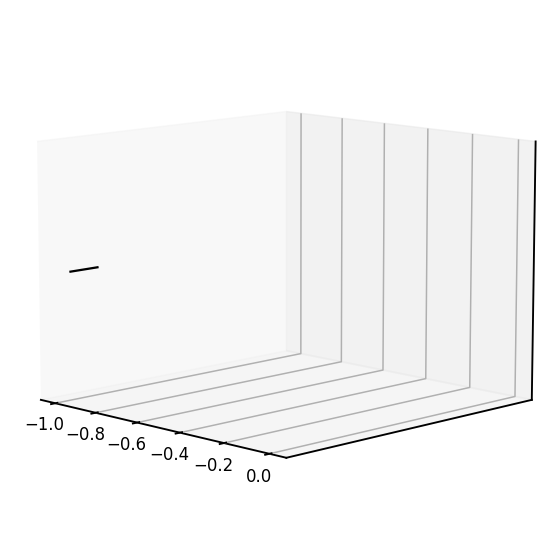

In [ ]:
example_legendre(legs_matrices.B, N=N)

In [ ]:
fru_matrices = TransMatrix(N=N, measure="fru")
A, B = fru_matrices.A, fru_matrices.B

<Figure size 1152x576 with 0 Axes>

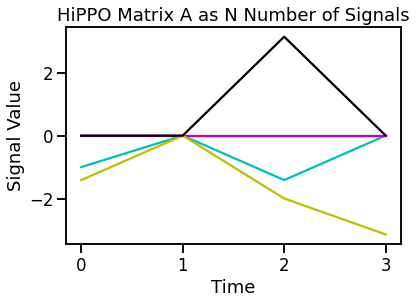

In [ ]:
visualize_A(A)

<Figure size 1152x576 with 0 Axes>

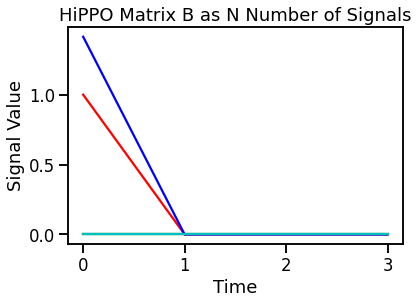

In [ ]:
visualize_B(A, B)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


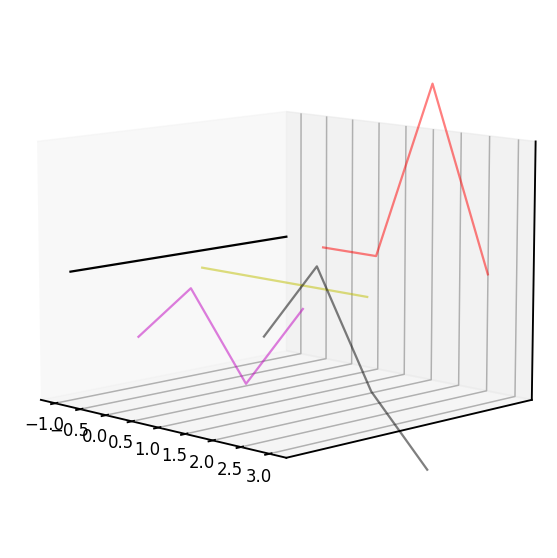

In [ ]:
example_legendre(fru_matrices.A, N=N)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


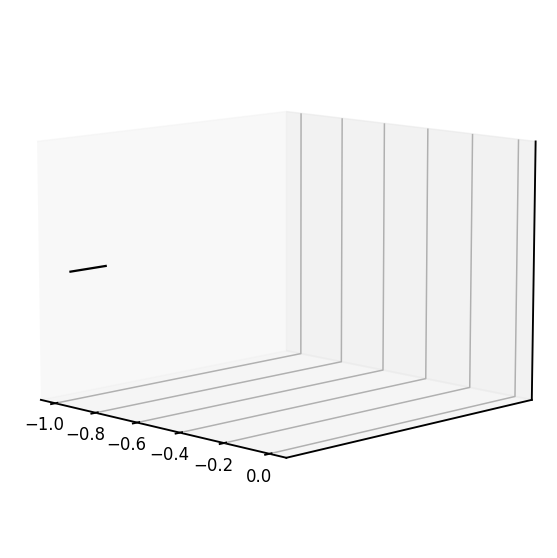

In [ ]:
example_legendre(fru_matrices.B, N=N)

In [ ]:
fout_matrices = TransMatrix(N=N, measure="fout")
A, B = fout_matrices.A, fout_matrices.B

<Figure size 1152x576 with 0 Axes>

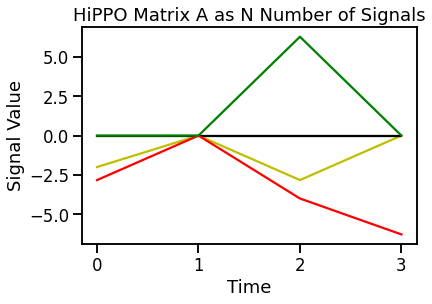

In [ ]:
visualize_A(A)

<Figure size 1152x576 with 0 Axes>

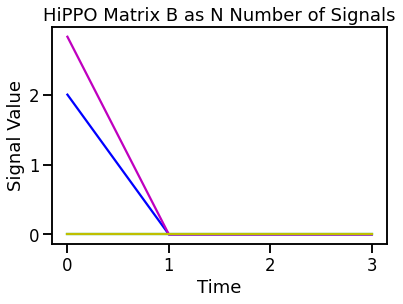

In [ ]:
visualize_B(A, B)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


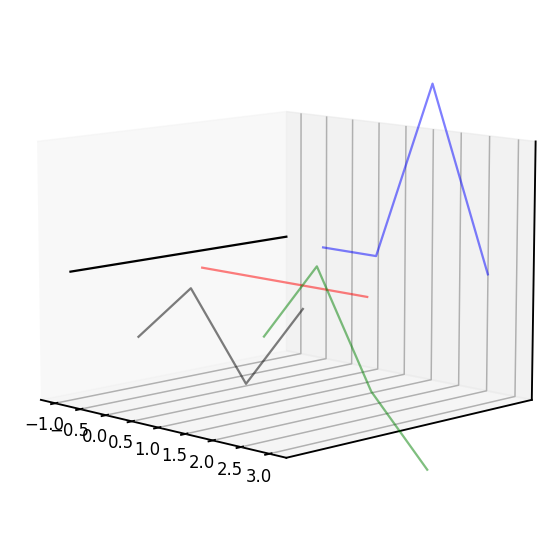

In [ ]:
example_legendre(fout_matrices.A, N=N)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


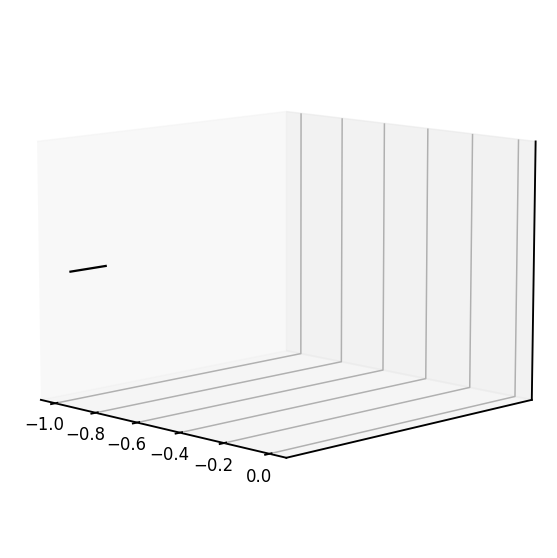

In [ ]:
example_legendre(fout_matrices.B, N=N)

In [ ]:
foud_matrices = TransMatrix(N=N, measure="foud")
A, B = foud_matrices.A, foud_matrices.B

<Figure size 1152x576 with 0 Axes>

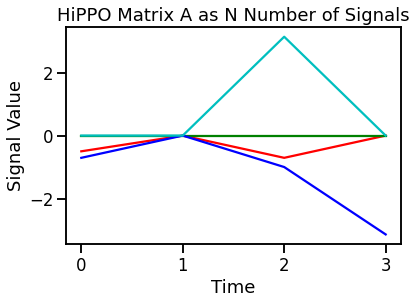

In [ ]:
visualize_A(A)

<Figure size 1152x576 with 0 Axes>

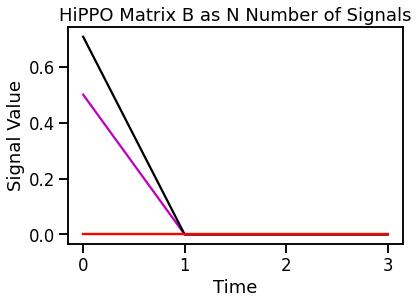

In [ ]:
visualize_B(A, B)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


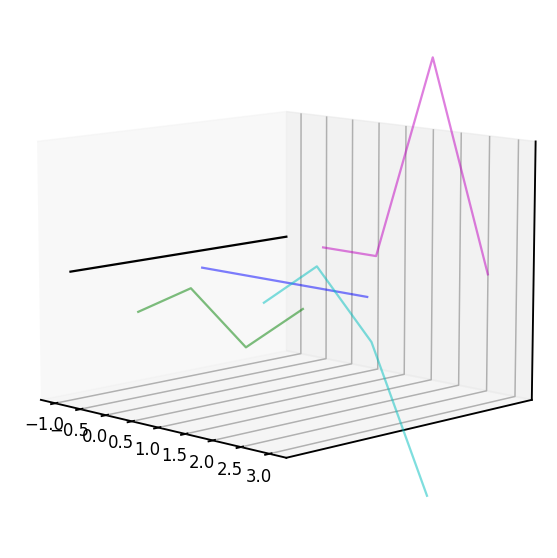

In [ ]:
example_legendre(foud_matrices.A, N=N)

<ipython-input-533-23dc3c6347f6>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


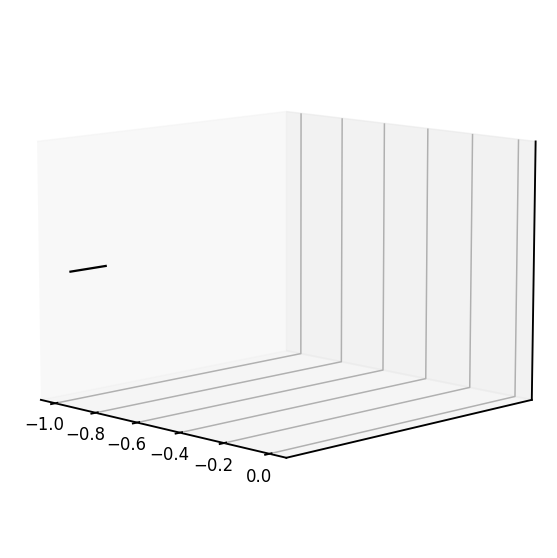

In [ ]:
example_legendre(foud_matrices.B, N=N)